# AI/ML Challenge

A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

> Objective: You are the best data scientist in Greenland and they've hired you to solve this problem. Now you are responsible for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).

About the dataset: The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

> Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment

> Survived_1_year == 1, implies that the patient survived after 1 year of treatment


# Data Description

ID_Patient_Care_Situation: Care situation of a patient during treatment

Diagnosed_Condition: The diagnosed condition of the patient

ID_Patient: Patient identifier number

Treatment_with_drugs: Class of drugs used during treatment

Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

Patient_Age: Age of the patient

Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

Patient_Smoker: If the patient was a smoker or not

Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country

Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )





In [1]:
# Importing Libraries
import os
import sys

# For Panel Data & linear algebra
import pandas as pd
import numpy as np

# For visualizations
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading csv file using pandas
df = pd.read_csv(r"A:\Mahesh\1.Working\Data\DPhi\Final\Train_Data.csv", index_col = None)
df.head(10)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
7,17265,9,5947,DX5,3,18.126976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
8,24349,47,6585,DX4,62,25.074482,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
9,1647,17,10190,DX6,46,17.663877,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [3]:
print('The dataset contains {} rows of training samples with {} feature columns'.format(df.shape[0], df.shape[1]))

The dataset contains 23097 rows of training samples with 18 feature columns


So the shape is (23097, 18).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [5]:
# Descriptive Statistics
df.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


# Exploratory Data Analysis (EDA)

In [6]:
# From above it is evident there are missing values, so to eliminate them 
df_copy = df.copy()
df_copy.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [7]:
df_copy.fillna(df_copy.mode().iloc[0], inplace = True) # Fill values using the mode as it is a categorical value
df_copy.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

After learning the features and their relevance, it is well understood that among the demographic features 'Patient_ID', 'Patient_Age' we can use the former one to identify whether the number of patients and training samples are default or else duped.

In [8]:
# Duplicated Values
print(df_copy['Patient_ID'].duplicated().sum())
df_copy.sort_values('Patient_ID', inplace = True)
bool_series = df_copy['Patient_ID'].duplicated()
duplicate_df = df_copy[bool_series]
duplicate_df

12527


,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
21920,26429,33,1,DX4,30,25.890033,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
16854,27772,34,2,DX6,39,29.921864,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
16262,11732,37,3,DX4,19,25.242091,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
9030,17677,20,5,DX6,31,17.096321,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
8025,13927,16,5,DX6,31,17.096321,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10401,18074,4,12498,DX1 DX3,15,26.132668,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
8842,30963,6,12498,DX6,15,26.132668,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
18687,9122,16,12498,DX3 DX5,15,26.132668,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
12457,2018,39,12499,DX6,39,26.871665,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


There are multiple number of duplicated values, from above we can identify that there might be either data wrong entry or patient joined multiple times if so then the database adminstrator entried multiple copies whenever he joined with the same patient ID.  

Lets dive in and understand more about the type of features: What are Category and Numeric Variables?
> From the pandas info function, there are 14 numeric variables(float-9 & int-5) and 4 object data types.

In [9]:
# Just dive in to understand the type of unique values and their counts for some features all in the "for" loop
for i in df_copy:
    if df_copy[i].dtype.name == 'object':
        print('Feature:', i)
        print(df_copy[i].unique())
        print(df_copy[i].value_counts())
        print('\n')

Feature: Treated_with_drugs
['DX4 ' 'DX2 ' 'DX6' 'DX1 DX3 ' 'DX1 DX4 DX5 ' 'DX1 DX4 ' 'DX4 DX5 '
 'DX5 ' 'DX1 ' 'DX3 ' 'DX2 DX3 ' 'DX1 DX3 DX4 ' 'DX2 DX3 DX5 ' 'DX2 DX4 '
 'DX1 DX2 DX5 ' 'DX1 DX2 ' 'DX3 DX4 ' 'DX3 DX4 DX5 ' 'DX1 DX3 DX5 '
 'DX1 DX5 ' 'DX2 DX5 ' 'DX1 DX2 DX3 ' 'DX1 DX2 DX3 DX5 ' 'DX3 DX5 '
 'DX2 DX4 DX5 ' 'DX1 DX2 DX4 DX5 ' 'DX1 DX2 DX4 ' 'DX1 DX3 DX4 DX5 '
 'DX2 DX3 DX4 ' 'DX1 DX2 DX3 DX4 ' 'DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX3 DX4 DX5 ']
DX6                     8619
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX1 DX2                  448
DX3 DX4                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4            

The categorical features provided valuable informations:
> Most number of patients were treated with "DX6"

> Most number of patients are non-smokers.

> In the admitted patients, 70% belongs to rural population, if we compare it to national population can derive the social-economic insights regarding the illness.

> All admitted patients are mentally stable. 

While, for the clean data modelling 'Patient_Smoker' feature value 'Cannot say' can be replaced to either smoker or non-smoker. As these values are very small in number by doing this the model wont get disturbed.


In [10]:
# Replacing "Cannot Say" to Non_Smoker 
df_copy['Patient_Smoker'].replace(to_replace = 'Cannot say', value = 'NO', inplace = True)
df_copy['Patient_Smoker'].value_counts()

NO     13259
YES     9838
Name: Patient_Smoker, dtype: int64

# Data Visualization

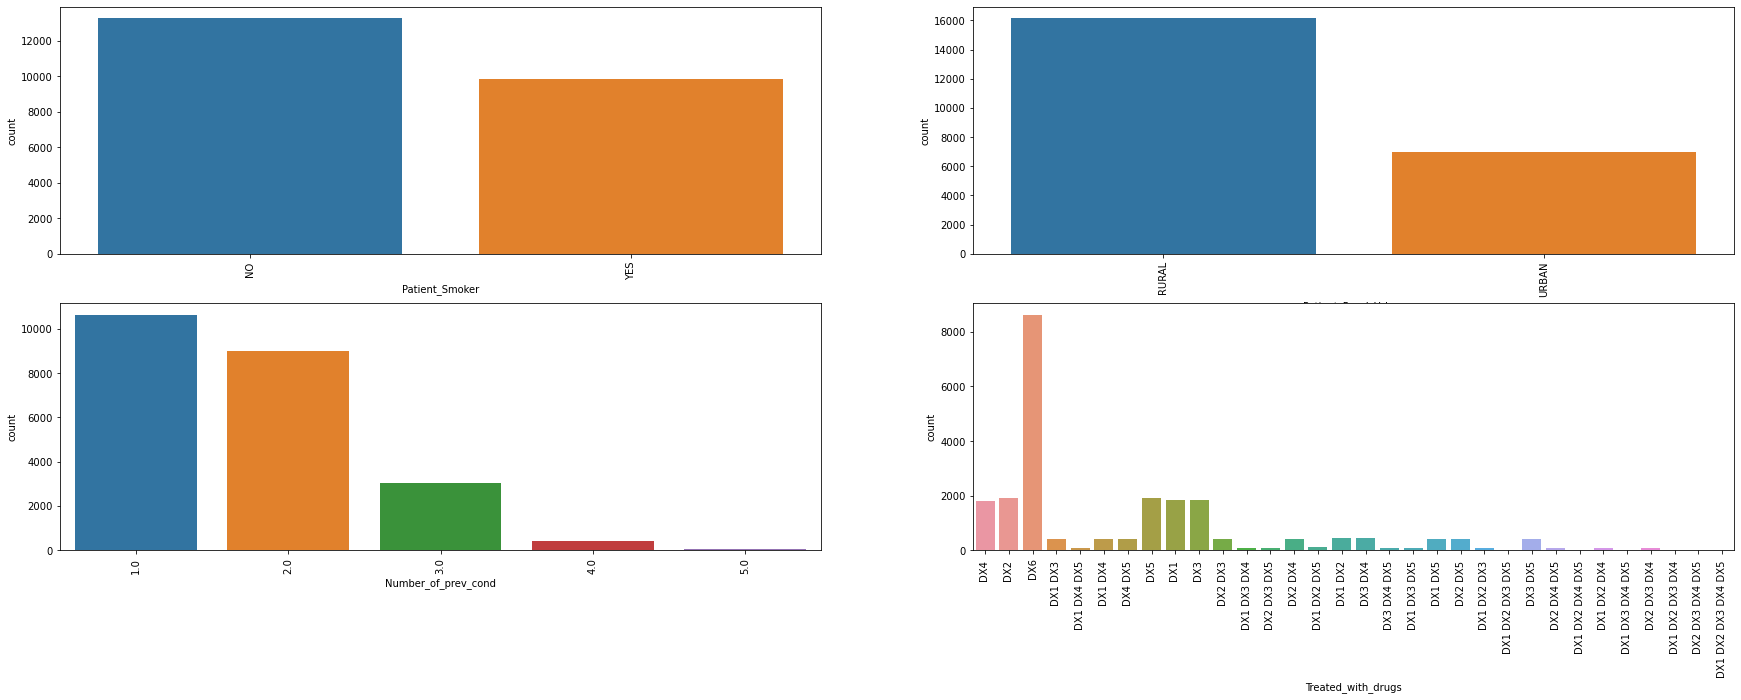

In [11]:
# Visualization of selective categorical features

categorical = ['Patient_Smoker', 'Patient_Rural_Urban', 'Number_of_prev_cond', 'Treated_with_drugs']

fig,ax = plt.subplots(2,2, figsize = (30,10))

# Count plot 
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df_copy[variable], ax = subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

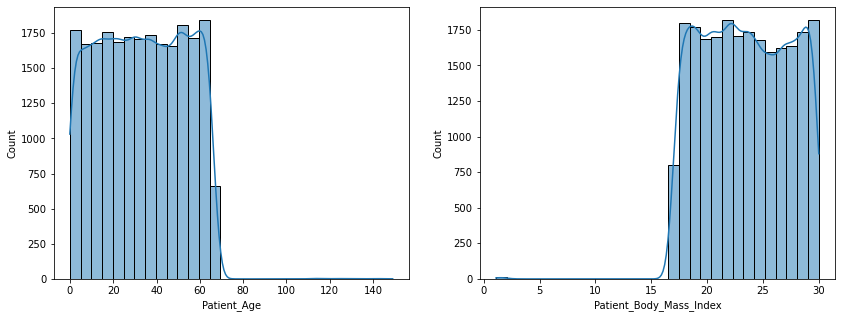

In [12]:
# To understand the distribution of people ages and their respective BMI
numeric = ['Patient_Age', 'Patient_Body_Mass_Index']
fig, axs = plt.subplots(1,2,figsize = (14,5))
sns.histplot(x = df[numeric[0]], bins = 30, kde  = True, ax = axs[0])
sns.histplot(x = df[numeric[1]], bins = 30, kde = True, ax = axs[1]);

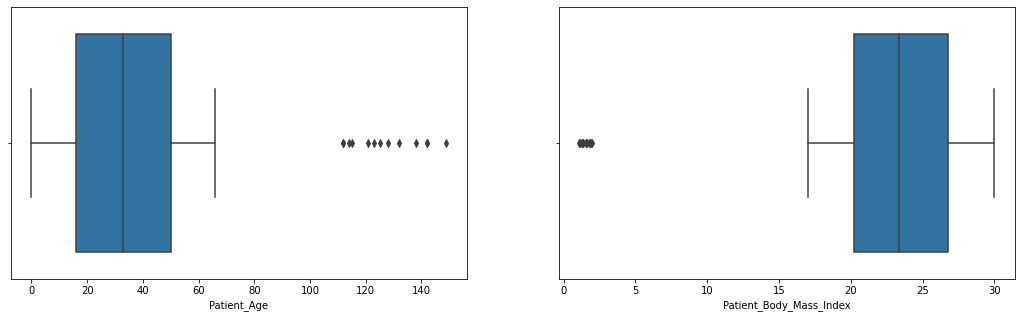

In [13]:
# Box plots: Best visualization form to identify outliers
numeric = ['Patient_Age', 'Patient_Body_Mass_Index']

fig, ax = plt.subplots(1,2,figsize = (18,5))

# Box plot
for variable, subplot in zip(numeric, ax.flatten()):
    sns.boxplot(x = variable, data = df_copy, ax = subplot)

In [14]:
# Understanding the obesrved outliers as per the box plot
outliers_age = df_copy[df_copy['Patient_Age'] > 100] # Patient Age
outliers_BMI = df_copy[df_copy['Patient_Body_Mass_Index'] < 10]

# Checking whether both are same indexes are not 
print('Both outliers indexes are same?', outliers_age.equals(outliers_BMI))

outliers_age

Both outliers indexes are same? True


,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
12782,33000,0,12501,DX6,112,1.5465,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4308,33001,0,12502,DX6,114,1.6239,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
19123,33002,0,12503,DX6,115,1.8199,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2711,33004,0,12505,DX6,123,1.9290,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
18630,33005,0,12506,DX6,125,1.2581,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10388,33006,0,12507,DX6,138,1.3745,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
218,33008,0,12509,DX6,112,1.2925,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10663,33009,0,12510,DX6,142,1.1450,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
6308,33010,0,12511,DX6,142,1.5701,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4887,33011,0,12512,DX6,132,1.9896,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


After viewing the values, initially felt is there any continuity in the data values as the BMI are very low in numbers and age higher in number. With complete research over web there are 3836 people older than 105 age but the maximum living age is 122 & the numbers here are higher in number than actual data also we need to understand that BMI should & cannot be at such low values. So either deleting the rows or replacing those values with mean/median is advised[when only their response variables belongs to minor group if imbalanced dataset too; To check how model works as it falls in to the wrong data entry group]  

In [15]:
# Here the outliers response variables belong to the majority group we delete them completely
df_copy.drop(df_copy[df_copy['Patient_Age'] > 100].index, inplace = True)
df_copy[df_copy['Patient_Age'] > 100]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year


Text(0, 0.5, 'Survival Rate')

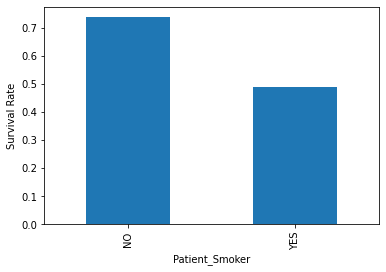

In [16]:
# Aggregated Mean Average for smokers survived and not.
df_copy.groupby('Patient_Smoker').agg({'Survived_1_year' : 'mean'}).plot.bar(legend = False)
plt.ylabel('Survival Rate')

In [17]:
# Checking how much smoking having realtionship with the survival
df_copy.groupby('Patient_Smoker')['Survived_1_year'].value_counts()

Patient_Smoker  Survived_1_year
NO              1                  9767
                0                  3479
YES             0                  5015
                1                  4823
Name: Survived_1_year, dtype: int64

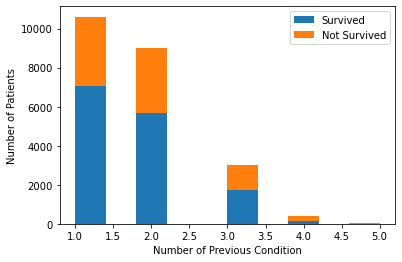

In [18]:
# Depending upon the condition of previous conditions
Prev_condition_survived = df_copy['Number_of_prev_cond'][df_copy['Survived_1_year'] == 1]
Prev_condition_not_survived = df_copy['Number_of_prev_cond'][df_copy['Survived_1_year'] == 0]

# For histograms
plt.hist([Prev_condition_survived, Prev_condition_not_survived], histtype = 'barstacked')
plt.xlabel('Number of Previous Condition')
plt.ylabel('Number of Patients')
plt.legend(['Survived', 'Not Survived'])

<AxesSubplot:>

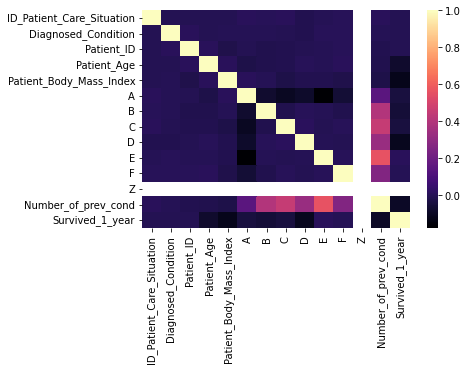

In [19]:
# Correlation Matrix
df_corr = df_copy.corr()
sns.heatmap(df_corr, cmap = 'magma')

# Feature Engineering before the model implementation

As the system is incapable of learning if the training data contains enough irrelaevant features. So in order to come up with a good set of features to train. So using the information turned to build feature matrix.

In [20]:
# Features and Response Variable Dataset 
df = df_copy.drop('Survived_1_year', axis = 1)
df_labels = df_copy['Survived_1_year'].copy()

In [21]:
# Data Cleaning >> Numeric(Performed to fill missing values process again to channelize pipeline)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
df_num = df.drop(['Treated_with_drugs', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition'], axis = 1)
X = imputer.fit_transform(df_num)
df_num_df = pd.DataFrame(X, columns = df_num.columns)
df_num_df

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond
0,9563.0,3.0,1.0,30.0,25.890033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,26429.0,33.0,1.0,30.0,25.890033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10342.0,32.0,2.0,39.0,29.921864,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,27772.0,34.0,2.0,39.0,29.921864,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,15709.0,16.0,3.0,19.0,25.242091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23079,9122.0,16.0,12498.0,15.0,26.132668,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23080,20242.0,21.0,12499.0,39.0,26.871665,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23081,2018.0,39.0,12499.0,39.0,26.871665,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23082,32220.0,32.0,12499.0,39.0,26.871665,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
# OHE for categories
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df_cat = df[['Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition', 'Treated_with_drugs']]
df_cat_encoded = ohe.fit_transform(df_cat)
df_cat_encoded[:10].toarray()

array([[1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [23]:
# Transformational Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')), ('scaler', StandardScaler())])
num_pipeline.fit_transform(df_num)

# For Comprehensive Pipeline
from sklearn.compose import ColumnTransformer
num_attrs = list(df_num)
cat_attrs = list(df_cat)
total_pipeline = ColumnTransformer([('num', num_pipeline, num_attrs), ('cat', OneHotEncoder(), cat_attrs)])
df_prepared = total_pipeline.fit_transform(df)
df_prepared.shape

(23084, 50)

In [24]:
# Creating Training and Test Datasets
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_prepared, df_labels, test_size = 0.2 , random_state = 42)
print('Positive Samples in Train set is {} and Test set is {}'.format(sum(y_train_new == 0), sum(y_test_new == 0)))

Positive Samples in Train set is 6837 and Test set is 1657


In [25]:
# Logistic Regression Model 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_new, y_train_new)

# Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score
df_log_predictions = log_reg.predict(X_test_new)
log_accuracy = accuracy_score(y_test_new, df_log_predictions)
log_f1_score = f1_score(y_test_new, df_log_predictions)
print('Accuracy', log_accuracy)
print('F1 - Score', log_f1_score)

Accuracy 0.7277452891487979
F1 - Score 0.8020160655221295


In [26]:
# Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_new, y_train_new)
df_dt_predictions = dt_clf.predict(X_test_new)
dt_accuracy = accuracy_score(y_test_new, df_dt_predictions)
dt_f1_score = f1_score(y_test_new, df_dt_predictions)
print('Accuracy', dt_accuracy)
print('F1 - Score', dt_f1_score)

Accuracy 0.7684643708035521
F1 - Score 0.820366324987397


In [27]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf_clf.fit(X_train_new, y_train_new)
df_rf_predictions = rf_clf.predict(X_test_new)
rf_accuracy =accuracy_score(y_test_new, df_rf_predictions)
rf_f1_score = f1_score(y_test_new, df_rf_predictions)
print('Accuracy', rf_accuracy)
print('F1 - Score', rf_f1_score)

Accuracy 0.7942386831275721
F1 - Score 0.8384903094185652


From above all the three models it is clearly evident that the RandomForestClassifier algorithm is providing best values. Further by tuning the hyperparameters using GridSearchCV and implementing cross-validation techique choosed the best hyperparamters on the best value of 'F1_score' and this estimator will be used for the final model predictions. 

In [28]:
# Random Forest Classifier GridSearch for tuning hyperparameters
from sklearn.model_selection import GridSearchCV, cross_val_predict
param_grid = [{'n_estimators': [50,100,150,200,300], 'max_features': [5,10,15,20]}]
rf_gridsearchcv = GridSearchCV(rf_clf, param_grid = param_grid, cv =5, scoring = 'f1', return_train_score = True)
rf_gridsearchcv.fit(X_train_new, y_train_new)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=10, random_state=42),
             param_grid=[{'max_features': [5, 10, 15, 20],
                          'n_estimators': [50, 100, 150, 200, 300]}],
             return_train_score=True, scoring='f1')

In [29]:
# Cross-validation results
cv_res = rf_gridsearchcv.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(mean_score, params)

0.8463419335116301 {'max_features': 5, 'n_estimators': 50}
0.8501560327723189 {'max_features': 5, 'n_estimators': 100}
0.8503737726187424 {'max_features': 5, 'n_estimators': 150}
0.8518042178547527 {'max_features': 5, 'n_estimators': 200}
0.8512510399469653 {'max_features': 5, 'n_estimators': 300}
0.8510027529383262 {'max_features': 10, 'n_estimators': 50}
0.8530159572070678 {'max_features': 10, 'n_estimators': 100}
0.8529253125151003 {'max_features': 10, 'n_estimators': 150}
0.8526646535978111 {'max_features': 10, 'n_estimators': 200}
0.8528644602568913 {'max_features': 10, 'n_estimators': 300}
0.8502708311851629 {'max_features': 15, 'n_estimators': 50}
0.851622267104525 {'max_features': 15, 'n_estimators': 100}
0.8524033522567693 {'max_features': 15, 'n_estimators': 150}
0.8527270124332175 {'max_features': 15, 'n_estimators': 200}
0.8518655563995905 {'max_features': 15, 'n_estimators': 300}
0.8496200422345617 {'max_features': 20, 'n_estimators': 50}
0.8509562383706047 {'max_features'

In [30]:
# Model Results over Random Forest best estimator
print(rf_gridsearchcv.best_params_)
print(rf_gridsearchcv.best_estimator_)
model_adjust = rf_gridsearchcv.best_estimator_
model_adjust.fit(X_train_new, y_train_new)
y_pred = model_adjust.predict(X_test_new)
print('acc:', accuracy_score(y_test_new, y_pred))
print('f1:', f1_score(y_test_new, y_pred))

{'max_features': 10, 'n_estimators': 100}
RandomForestClassifier(max_features=10, random_state=42)
acc: 0.8113493610569634
f1: 0.8542747197590764


The best predictive score is 85%, we will check whether tweaking with the feature selection improves the performance more or not.

# Error Analysis

In [31]:
# confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_new, y_pred)
confusion_matrix

array([[1193,  464],
       [ 407, 2553]], dtype=int64)

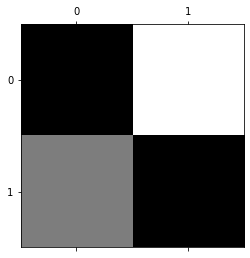

In [32]:
row_sums = confusion_matrix.sum(axis = 1, keepdims = True)
norm_confusion_matrix = confusion_matrix/ row_sums
np.fill_diagonal(norm_confusion_matrix, 0)
plt.matshow(norm_confusion_matrix, cmap = plt.cm.gray)

# Final Predictions

In [33]:
# Importing testing data set and resolving the same then predictions
df_final = pd.read_csv(r"A:\Mahesh\1.Working\Data\DPhi\Final\Test_Data.csv")
df_final.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
total_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['ID_Patient_Care_Situation',
                                  'Diagnosed_Condition', 'Patient_ID',
                                  'Patient_Age', 'Patient_Body_Mass_Index', 'A',
                                  'B', 'C', 'D', 'E', 'F', 'Z',
                                  'Number_of_prev_cond']),
                                ('cat', OneHotEncoder(),
                                 ['Patient_Smoker', 'Patient_Rural_Urban',
                                  'Patient_mental_condition',
                                  'Treated_with_drugs'])])

In [35]:
df_final_prepared = total_pipeline.fit_transform(df_final)
df_final_prepared

array([[ 0.28930733,  0.8822645 , -0.69268863, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71590457,  1.67712279, -1.44197653, ...,  0.        ,
         0.        ,  1.        ],
       [-0.47239853,  1.54464641,  1.53949039, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.47292312, -0.70745207,  1.44373123, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.91367531,  1.54464641, -0.1500534 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25835647,  1.6108846 ,  1.1523262 , ...,  0.        ,
         0.        ,  1.        ]])

In [36]:
# Using Random forest 
final_model = rf_gridsearchcv.best_estimator_
Prediction = pd.DataFrame(final_model.predict(df_final_prepared), columns = ['prediction'])
Prediction_csv = Prediction.to_csv(r"A:\Mahesh\1.Working\Data\DPhi\Final\prediction.csv", index = False, header= True)

# Feature Selection Model

This is an alternative feature selection model which is tried to understand how model improves by tweaking with the top 40 features. As the model is evaluated by metrics we followed the same procedure as above just that features here selected by using provided sklearn methods. 

In [37]:
# Creating dummies feature and try to recreate the model and check with results
df_dummy = pd.get_dummies(df_copy) # Using Dummies for categorical encoding
df_dummy.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year',
       'Treated_with_drugs_DX1 ', 'Treated_with_drugs_DX1 DX2 ',
       'Treated_with_drugs_DX1 DX2 DX3 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX5 ', 'Treated_with_drugs_DX1 DX3 ',
       'Treated_with_drugs_DX1 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX3 DX5 ', 'Treated_with_drugs_DX1 DX4 ',
       'Treated_with_drugs_DX1 DX4 DX5 ', 'Treated_with_drugs_DX1 DX5 ',
       'Treated_with_drugs_DX2 ', 'Treated_with_drugs_DX2 DX3 ',
       'Treated_with_drugs_DX2 DX3 DX4 ',
       'Treated_with_drugs_DX2 DX3 DX4 DX5 

In [38]:
# X, y 
X = df_dummy.drop('Survived_1_year', axis  = 1).copy()
y = df_dummy['Survived_1_year']

In [39]:
from sklearn.feature_selection import f_classif
[F_statistic, F_p_value] = f_classif(X, y)
F_test_df = pd.DataFrame({'features': X.columns , 'F-Statistic': F_statistic, 'P-value': F_p_value})
F_test_df_sorted = F_test_df.sort_values('P-value')
F_test_df_sorted

,features,F-Statistic,P-value
46,Patient_Smoker_YES,1583.835889,0.000000e+00
45,Patient_Smoker_NO,1583.835889,0.000000e+00
44,Treated_with_drugs_DX6,2820.562156,0.000000e+00
4,Patient_Body_Mass_Index,340.217759,1.994281e-75
43,Treated_with_drugs_DX5,307.281234,2.369220e-68
47,Patient_Rural_Urban_RURAL,295.967567,6.421484e-66
48,Patient_Rural_Urban_URBAN,295.967567,6.421484e-66
8,D,270.221389,2.238696e-60
12,Number_of_prev_cond,195.558492,2.950043e-44
3,Patient_Age,139.565073,4.100938e-32


In [40]:
# Top 40 Features as model inputs and Response variable 
X_model = X[F_test_df_sorted['features'][:40]]
y_model = y
print(X_model.shape, y_model.shape)

(23084, 40) (23084,)


In [41]:
# Training and Testing Data Set
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_model, y_model, test_size = 0.2 , random_state = 42)
print('Positive Samples in Train set is {} and Test set is {}'.format(sum(y_train_1 == 0), sum(y_test_1 == 0)))

Positive Samples in Train set is 6837 and Test set is 1657


In [42]:
# Logistic Regression Model 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_1, y_train_1)

# Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score
df_log_predictions_1 = log_reg.predict(X_test_1)
log_accuracy_1 = accuracy_score(y_test_1, df_log_predictions_1)
log_f1_score_1 = f1_score(y_test_1, df_log_predictions_1)
print('Accuracy', log_accuracy_1)
print('F1 - Score', log_f1_score_1)

Accuracy 0.7312107429066493
F1 - Score 0.8051499450463181


In [43]:
# Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_1, y_train_1)
df_dt_predictions_1 = dt_clf.predict(X_test_1)
dt_accuracy_1 = accuracy_score(y_test_1, df_dt_predictions_1)
dt_f1_score_1 = f1_score(y_test_1, df_dt_predictions_1)
print('Accuracy', dt_accuracy_1)
print('F1 - Score', dt_f1_score_1)

Accuracy 0.7205977907732294
F1 - Score 0.7789581905414666


In [44]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_1, y_train_1)
df_rf_predictions_1 = rf_clf.predict(X_test_1)
rf_accuracy_1 = accuracy_score(y_test_1, df_rf_predictions_1)
rf_f1_score_1 = f1_score(y_test_1, df_rf_predictions_1)
print('Accuracy', rf_accuracy_1)
print('F1 - Score', rf_f1_score_1)

Accuracy 0.7639159627463721
F1 - Score 0.8194168323392975


In [45]:
# Random Forest Best Estimator from previously traied Model
model_adjust.fit(X_train_1, y_train_1)
df_rf_predictions_best = model_adjust.predict(X_test_1)
rf_accuracy_1 = accuracy_score(y_test_1, df_rf_predictions_best)
rf_f1_score_1 = f1_score(y_test_1, df_rf_predictions_best)
print('Accuracy', rf_accuracy_1)
print('F1 - Score', rf_f1_score_1)

Accuracy 0.7658652804851636
F1 - Score 0.8206999502405042


The predictions of model in this challenge is evaluated on the metric "F1_score". The belong doesn't include in the challenge which is to understand the model, how it is performing?

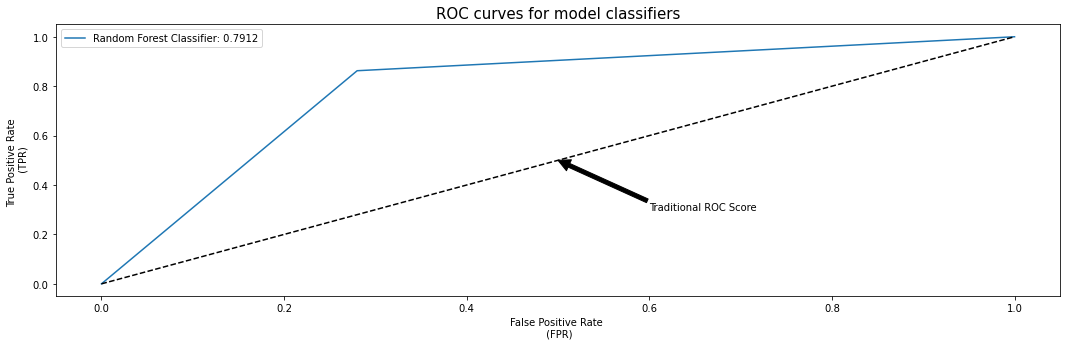

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve

# False Positive Rates, True Positive Rates, Thresholds
rf_fpr, rf_tpr, rf_thresh = roc_curve(y_test_new, y_pred)

# Plotting roc curves
def roc_curves(rf_fpr, rf_tpr):
    plt.figure(figsize = (18,5))
    plt.plot(rf_fpr, rf_tpr, label = 'Random Forest Classifier: {:.4f}'.format(roc_auc_score(y_test_new, y_pred)))
    plt.plot([0,1], [0,1], 'k--')
    # Plot Annotations
    plt.title('ROC curves for model classifiers', fontsize = 15)
    plt.xlabel('False Positive Rate \n (FPR)', fontsize = 10)
    plt.ylabel('True Positive Rate \n (TPR)', fontsize = 10)
    plt.annotate('Traditional ROC Score',xy = (0.5,0.5), xytext = (0.6, 0.3), arrowprops = dict(facecolor = 'black'))
    plt.legend(fontsize = 10)  
    
# Final ROC Curves
roc_curves(rf_fpr, rf_tpr)

In [47]:
# F1-scores with classifiers
final_df = pd.DataFrame(
        {'Classifier': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Grid Search Random Forest'], 
                         'Accuracy': [log_accuracy, dt_accuracy, rf_accuracy, accuracy_score(y_test_new, y_pred)], 
                         'F1_score': [log_f1_score, dt_f1_score, rf_f1_score, f1_score(y_test_new, y_pred)]
                        }
                       ) 

final_df

,Classifier,Accuracy,F1_score
0,Logistic Regression,0.727745,0.802016
1,Decision Tree Classifier,0.768464,0.820366
2,Random Forest Classifier,0.794239,0.838490
3,Grid Search Random Forest,0.811349,0.854275


From the results of final_df, the predictive modeling should be built on random forest best estimator after tuning with the hyperparameters. 

# Key Insights

The data provided gave information which actually helps to estimate and then correspond to the national healthcare statistics thus by to implement policies. For suppose the admitted patients, 70% belongs to rural population, if we compare it to national population can derive the social-economic insights regarding the illness, thereby formulating necessary healthcare policy specified to rural population not by generalizing for the whole population which is not effective from past ages.

Key Findings:
> Rural Population patients are 16134, while urban are 6963.

> Patients BMI are moderately-to over weighted, which actually is a good signfier that the reason for admission to hospital is not nutritional deficiencies.

> Patients lifestyle habits such as smoking has a larger impact over their condition, as just 60% of the total belongs to non-smokers which is very less in number, statistically from the smokers group approximately out of 2 people 1 has not survived, survival chance is less than 45% but whereas in the other case patients who are not smokers has 80% of chance to survive.

> DX6 is the only most provided medication despite the fact that the survival chance is low only for this single medication.

### There is a lot of scope to improve the model effectiveness and will be updated in the course of my learnings, identified by introducing more algorithms to identify and use the training data with models like XGB, Neural Netweorks etc.. 